In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import datetime

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 코로나 일일 확진자 수 파일(9월 4일까지)
df1 = pd.read_csv('./data_2/daily2.csv', header='infer',encoding = 'euc-kr', na_values=[' '])

In [4]:
# 결측치 제거
df1.dropna(inplace=True)

In [5]:
# 날짜 기준 오름차순 정렬
df1.sort_values(by='date', ascending = True, inplace=True)

In [6]:
# 인덱스 재정렬
df1.reset_index(drop = True, inplace=True)

In [7]:
# 열 이름 변경
df1['confirmed_day'] = df1['confirmed']

In [8]:
df1.drop('confirmed', axis=1, inplace=True)

In [9]:
# 확진자 수 타입 int로 변경
df1['confirmed_day'] = df1['confirmed_day'].astype('int64')

In [10]:
# 전체 데이터 중 전체 지역 합계 데이터만 추출
df1_sum = df1[df1['province']=='합계']

In [11]:
# 인덱스 초기화
df1_sum.reset_index(drop = True, inplace=True)

In [12]:
# 3월 1일 이전 데이터 추가
df1_time= pd.read_csv('./data_2/Time_2.csv', header='infer',encoding = 'utf-8', na_values=[' '])

In [13]:
# 일일 확진자수 열 생성
df1_time['confirmed_day'] = df1_time['confirmed']

In [14]:
# 일일 확진자수 계산
for i in range(df1_time.shape[0]):
    if i == 0:
        df1_time.iloc[0, 7] = df1_time.iloc[0, 4]
    elif i >= 1:
        df1_time.iloc[i, 7] = df1_time.iloc[i, 4] - df1_time.iloc[i-1, 4]

In [15]:
# 정책 데이터프레임
df2 = pd.read_csv('./data_2/Policy.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [16]:
# 정책 아이디를 인덱스로 설정
df2.set_index(['policy_id'], inplace=True)

In [17]:
# 정책 중 Alert 타입만 추출
df2_alert = df2[df2['type']=='Alert']

## 전염병 경고 2단계

In [18]:
# 데이터 프레임 생성
df1_level2 = df1_time[(df1_time['date'] >= df2.loc[2, 'start_date']) & (df1_time['date'] <= df2.loc[2, 'end_date'])]

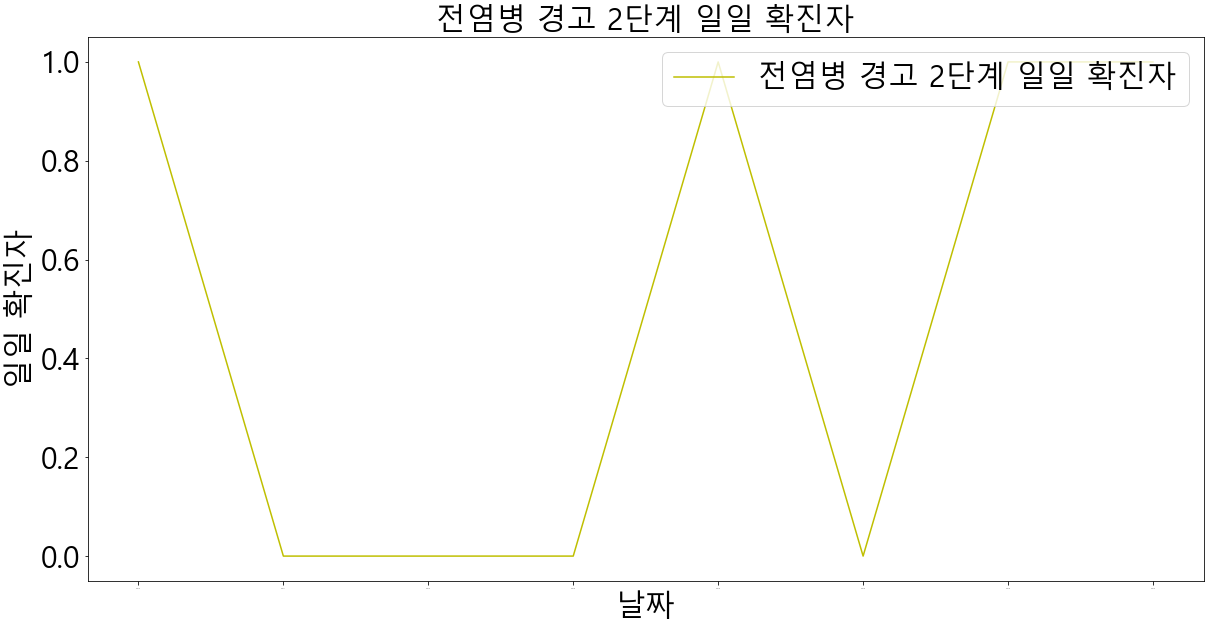

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(df1_level2['date'], df1_level2['confirmed_day'],label='전염병 경고 2단계 일일 확진자', color='y')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('전염병 경고 2단계 일일 확진자', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 2단계에선 아직 확진자 수가 많지 않다.

## 전염병 경고 3단계

In [20]:
# 데이터 프레임 생성
df1_level3 = df1_time[(df1_time['date'] >= df2.loc[3, 'start_date']) & (df1_time['date'] <= df2.loc[3, 'end_date'])]

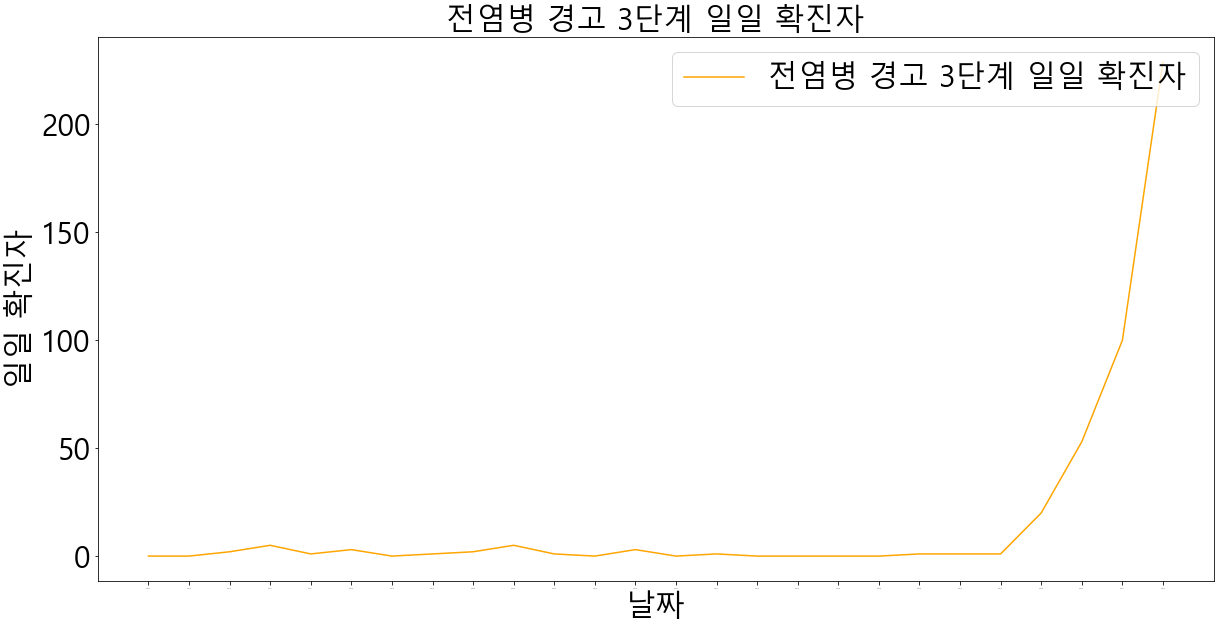

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(df1_level3['date'], df1_level3['confirmed_day'],label='전염병 경고 3단계 일일 확진자', color='orange')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('전염병 경고 3단계 일일 확진자', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 3단계가 끝날 쯤에 확진자수가 급증하는걸 볼 수 있고 그래서 4단계로 경고 단계를 올렸음을 알 수 있다.

## 전염병 경고 4단계

In [22]:
# 정책 시작일부터 6월 30일까지
df1_level4_left = df1_time[(df1_time['date'] >= df2.loc[4, 'start_date'])]

In [23]:
# daily2.csv와 concat 할 경우 대비
df1_level4_left['province'] = '합계'

In [24]:
# 필요한 열만 추출
df1_level4_left = df1_level4_left[['province', 'date', 'confirmed_day']]

In [25]:
# 7월 1일부터 9월 4일까지
df1_level4_right = df1_sum[(df1_sum['date'] >= '2020-07-01')]

In [26]:
# 두 데이터프레임 concat
df1_level4 = pd.concat([df1_level4_left, df1_level4_right])

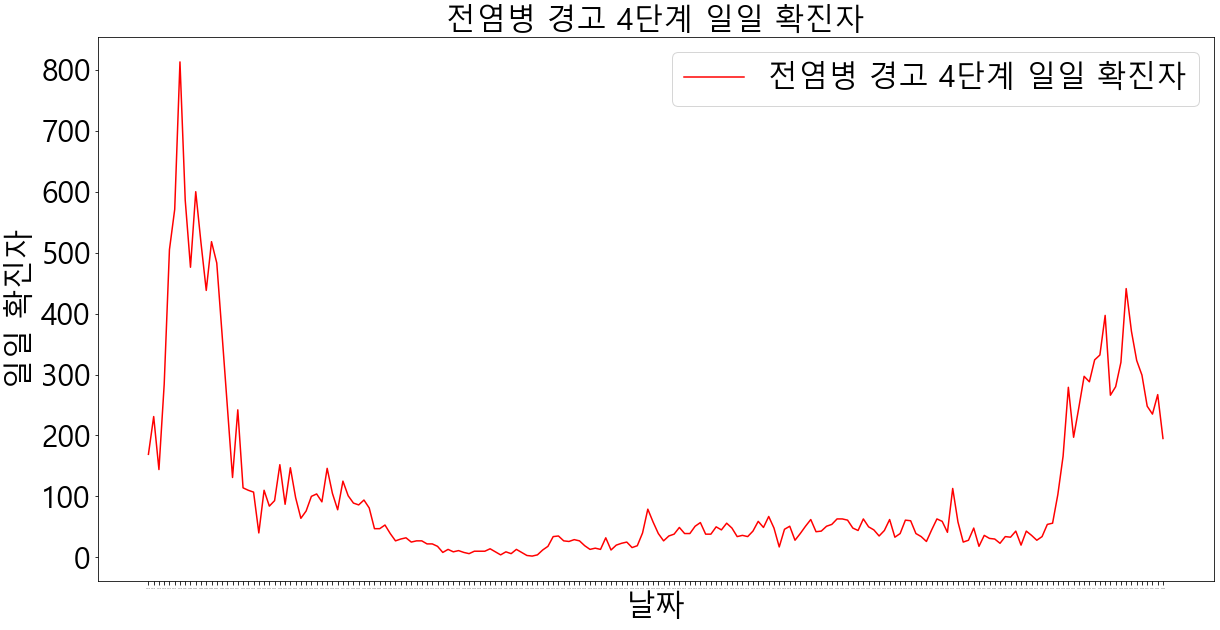

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(df1_level4['date'], df1_level4['confirmed_day'],label='전염병 경고 4단계 일일 확진자', color='red')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('전염병 경고 4단계 일일 확진자', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 4단계에서 코로나 일일 확진자 최고점을 찍었고 코로나 일일 확진자가 일정 수 이상 계속 나오기 때문에 4단계를 유지중임을 알 수 있다.

## 전염병 경고 단계별 일일 확진자

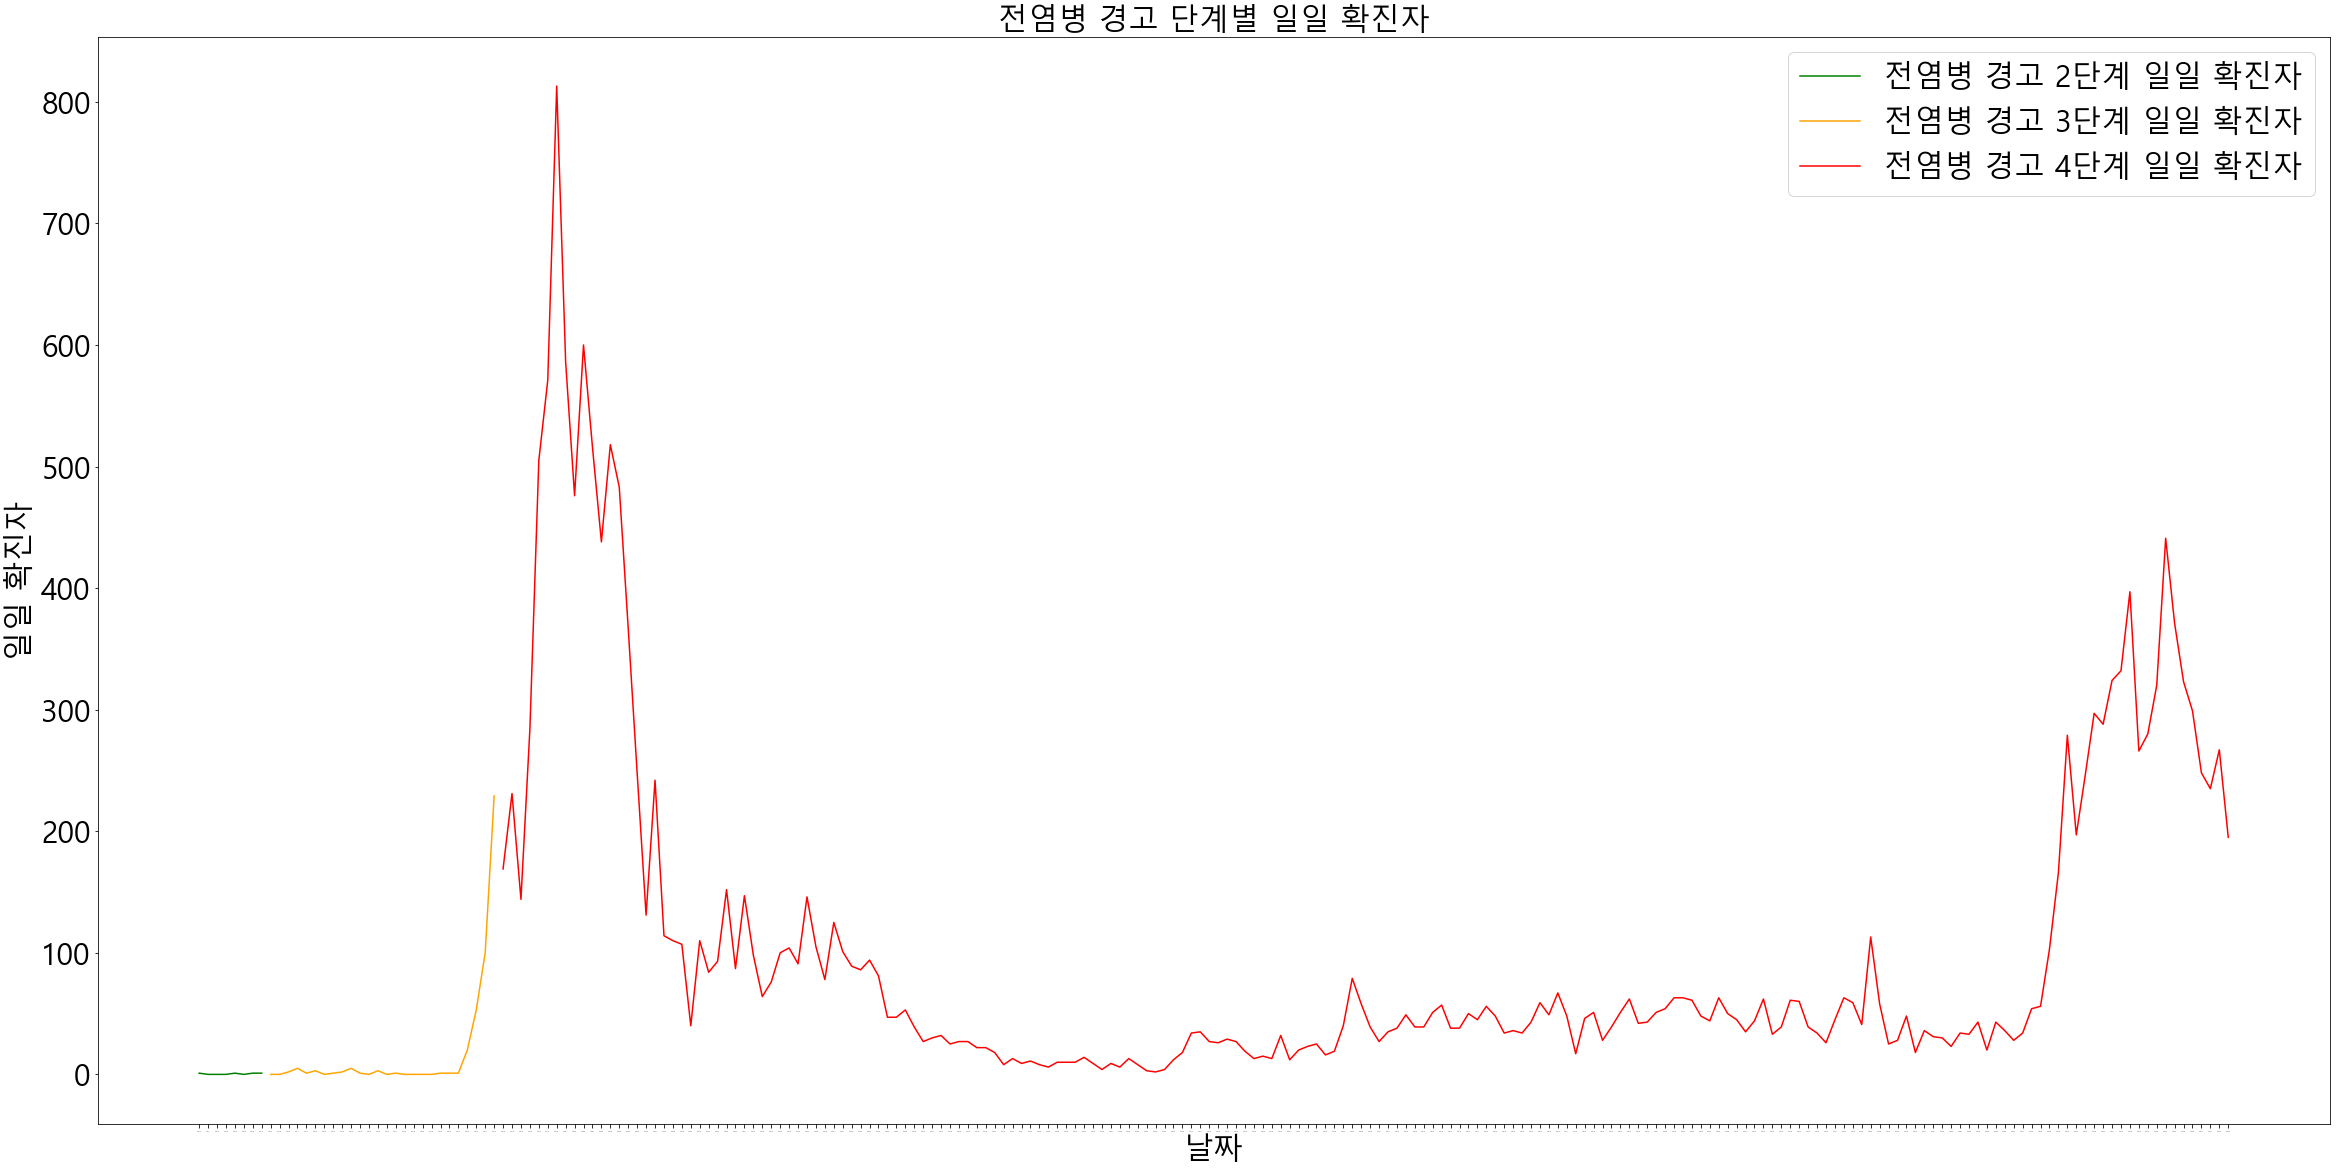

In [28]:
plt.figure(figsize=(40, 20))
plt.plot(df1_level2['date'], df1_level2['confirmed_day'],label='전염병 경고 2단계 일일 확진자', color='green')
plt.plot(df1_level3['date'], df1_level3['confirmed_day'],label='전염병 경고 3단계 일일 확진자', color='orange')
plt.plot(df1_level4['date'], df1_level4['confirmed_day'],label='전염병 경고 4단계 일일 확진자', color='red')

plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('전염병 경고 단계별 일일 확진자', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 확진자 수 증가 추세에 따라 전염병 경고 단계를 지정했음을 알 수 있다.